## Hidden Markov Model 
In this file there are three steps:

1. Train HMM model (Within the HMM, 'Viterbi' algorithm is used.) 
2. Test HMM model

In this simulation there are five different datasts: 
'hlisa_traces', 'gremlins', 'za_proxy', 'survey_desktop', 'random_mouse_bot'

The goal is to detect the as soon as we can

## Train HMM Model

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.stats import entropy
import random
import matplotlib.pyplot as plt
from hmmlearn import hmm
from hmmlearn.hmm import CategoricalHMM as hmm
import numpy as np
from sklearn.preprocessing import LabelEncoder

# List of all dataframe names

# Parameters for the random frame creation and the number of iterations
frame_length = 15000
num_iterations = 1

# Define the number of hidden states for the HMM
Hidden_states = 11

# Initialize the LabelEncoder which is used to normalize labels
encoder = LabelEncoder()

# Fit and transform the 'dir' data from the 'desktop_samples' dataframe
all_unique_labels = set()
for name in df_names:
    all_unique_labels.update(pos_dict['dir'][name])
encoder.fit(list(all_unique_labels))


# Initialize dictionaries to store the sequences of labels and time for each dataframe
Y_dict = {}
Time_dict={}

# Store the 'time' data in Time_dict
output_features=0
for name in df_names:
    Y= encoder.transform(pos_dict['dir'][name])
    Y=[[y] for y in Y]
    Y_dict[name]=Y
    Time_dict[name]=pos_dict['time'][name]
    output_features=np.max([output_features,np.max(Y)+1])

# Initialize empty lists to store the results
P_E1E2_list = []
x_coordinates = []
y_coordinates = []

# Create a dictionary to store the indices of the frames
indices_dict = {}

# Initialize the emission probability, initial state probability, and transition matrix for the HMM
Probs = np.random.rand(Hidden_states, output_features)
Probs = Probs / Probs.sum(axis=1)[:, np.newaxis]  # Normalize to sum to 1
Pinit= np.random.rand(Hidden_states)
Pinit=Pinit/np.sum(Pinit)  # Normalize to sum to 1
Ptransmat=np.random.rand(Hidden_states,Hidden_states)
Ptransmat = Ptransmat / Ptransmat.sum(axis=1)[:, np.newaxis]  # Normalize to sum to 1

# Initialize a dictionary to store the KL divergence between each pair of datasets
P_E1E2_dict={}

# Initialize a dictionary to store the trained HMM models for each dataframe
model={}

# Store the trained model in the 'model' dictionary

print('survey_desktop')
df_name='survey_desktop'
indices_dict[df_name] = []
indices_dict[df_name].append(index)
model1 = hmm(n_components=Hidden_states)
model1.emissionprob_ = Probs
model1.algorithm = 'viterbi'
model1.params = 'ste'
model1.n_features = output_features
model1.init_params = ''
model1.startprob_ = Pinit
model1.transmat_ = Ptransmat
frame_data1 = Y_dict[df_name][0:frame_length]
model1.fit(frame_data1)
model[df_name]=model1

Pinit=model1.startprob_
Ptransmat=model1.transmat_


for df_name in df_names:
    print(df_name)
    indices_dict[df_name] = []
    indices_dict[df_name].append(index)
    model1 = hmm(n_components=Hidden_states)
    model1.emissionprob_ = Probs
    model1.algorithm = 'viterbi'
    model1.params = 'te'
    model1.n_features = output_features
    model1.init_params = ''
    model1.startprob_ = Pinit
    model1.transmat_ = Ptransmat
    frame_data1 = Y_dict[df_name][0:frame_length]
    model1.fit(frame_data1)
    model[df_name]=model1

survey_desktop
hlisa_traces
gremlins
za_proxy
survey_desktop
random_mouse_bot


## Test HMM model and measure the accuracy

threshold is: 0.0
Probability of correct classification: 0.4859902801943961
Probability of correct classification for desktop: 0.13998600139986003
Probability of correct classification for non-desktop: 0.8474788130296743
Probability of correct classification for hlisa: 0.7299270072992702
Probability of correct classification for random_mouse_bot: 0.24997500249975005
Probability of correct classification for za_proxy: 0.34996500349965004
Average time to detect: 112.034
threshold is: 1.0
Probability of correct classification: 0.505989880202396
Probability of correct classification for desktop: 0.12998700129987004
Probability of correct classification for non-desktop: 0.8549786255343617
Probability of correct classification for hlisa: 0.8499150084991501
Probability of correct classification for random_mouse_bot: 0.19998000199980004
Probability of correct classification for za_proxy: 0.43995600439956006
Average time to detect: 167.368


/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986

threshold is: 2.0
Probability of correct classification: 0.7299854002919942
Probability of correct classification for desktop: 0.5099490050994901
Probability of correct classification for non-desktop: 0.9424764380890478
Probability of correct classification for hlisa: 0.7199280071992802
Probability of correct classification for random_mouse_bot: 0.7899210078992102
Probability of correct classification for za_proxy: 0.6799320067993201
Average time to detect: 331.986


/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986

threshold is: 3.0
Probability of correct classification: 0.7999840003199936
Probability of correct classification for desktop: 0.6699330066993301
Probability of correct classification for non-desktop: 0.9649758756031099
Probability of correct classification for hlisa: 0.7199280071992802
Probability of correct classification for random_mouse_bot: 0.9499050094990502
Probability of correct classification for za_proxy: 0.6999300069993001
Average time to detect: 251.704


/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986

threshold is: 4.0
Probability of correct classification: 0.8159836803263935
Probability of correct classification for desktop: 0.5799420057994201
Probability of correct classification for non-desktop: 0.9474763130921727
Probability of correct classification for hlisa: 0.6799320067993201
Probability of correct classification for random_mouse_bot: 0.9799020097990202
Probability of correct classification for za_proxy: 0.8499150084991501
Average time to detect: 358.328


/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986

threshold is: 5.0
Probability of correct classification: 0.8439831203375933
Probability of correct classification for desktop: 0.7099290070992902
Probability of correct classification for non-desktop: 0.9349766255843605
Probability of correct classification for hlisa: 0.7499250074992502
Probability of correct classification for random_mouse_bot: 0.9899010098990102
Probability of correct classification for za_proxy: 0.8499150084991501
Average time to detect: 361.914


/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986

threshold is: 6.0
Probability of correct classification: 0.8939821203575928
Probability of correct classification for desktop: 0.7699230076992302
Probability of correct classification for non-desktop: 0.9649758756031099
Probability of correct classification for hlisa: 0.7699230076992302
Probability of correct classification for random_mouse_bot: 0.9799020097990202
Probability of correct classification for za_proxy: 0.9699030096990302
Average time to detect: 441.268


/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986

threshold is: 7.0
Probability of correct classification: 0.881982360352793
Probability of correct classification for desktop: 0.7399260073992602
Probability of correct classification for non-desktop: 0.9474763130921727
Probability of correct classification for hlisa: 0.7599240075992402
Probability of correct classification for random_mouse_bot: 0.9899010098990102
Probability of correct classification for za_proxy: 0.9499050094990502
Average time to detect: 524.77


/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986

threshold is: 8.0
Probability of correct classification: 0.8939821203575928
Probability of correct classification for desktop: 0.6899310068993101
Probability of correct classification for non-desktop: 0.9649758756031099
Probability of correct classification for hlisa: 0.8799120087991201
Probability of correct classification for random_mouse_bot: 0.9999000099990002
Probability of correct classification for za_proxy: 0.9199080091990802
Average time to detect: 604.846


/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986

threshold is: 9.0
Probability of correct classification: 0.8999820003599928
Probability of correct classification for desktop: 0.6999300069993001
Probability of correct classification for non-desktop: 0.9774755631109222
Probability of correct classification for hlisa: 0.8299170082991701
Probability of correct classification for random_mouse_bot: 0.9899010098990102
Probability of correct classification for za_proxy: 0.9999000099990002
Average time to detect: 586.55


/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986

threshold is: 10.0
Probability of correct classification: 0.9059818803623928
Probability of correct classification for desktop: 0.7599240075992402
Probability of correct classification for non-desktop: 0.9624759381015475
Probability of correct classification for hlisa: 0.7799220077992202
Probability of correct classification for random_mouse_bot: 0.9999000099990002
Probability of correct classification for za_proxy: 0.9899010098990102
Average time to detect: 709.464


/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986

threshold is: 11.0
Probability of correct classification: 0.9119817603647927
Probability of correct classification for desktop: 0.7399260073992602
Probability of correct classification for non-desktop: 0.9724756881077973
Probability of correct classification for hlisa: 0.8399160083991601
Probability of correct classification for random_mouse_bot: 0.9999000099990002
Probability of correct classification for za_proxy: 0.9899010098990102
Average time to detect: 671.074


/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986

threshold is: 12.0
Probability of correct classification: 0.9199816003679927
Probability of correct classification for desktop: 0.7599240075992402
Probability of correct classification for non-desktop: 0.9849753756156097
Probability of correct classification for hlisa: 0.8499150084991501
Probability of correct classification for random_mouse_bot: 0.9999000099990002
Probability of correct classification for za_proxy: 0.9999000099990002
Average time to detect: 645.162


/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986

threshold is: 13.0
Probability of correct classification: 0.9159816803663927
Probability of correct classification for desktop: 0.7899210078992102
Probability of correct classification for non-desktop: 0.9699757506062349
Probability of correct classification for hlisa: 0.8199180081991801
Probability of correct classification for random_mouse_bot: 0.9799020097990202
Probability of correct classification for za_proxy: 0.9999000099990002
Average time to detect: 657.82


/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986

threshold is: 14.0
Probability of correct classification: 0.9019819603607928
Probability of correct classification for desktop: 0.7199280071992802
Probability of correct classification for non-desktop: 0.9724756881077973
Probability of correct classification for hlisa: 0.8099190080991902
Probability of correct classification for random_mouse_bot: 0.9999000099990002
Probability of correct classification for za_proxy: 0.9999000099990002
Average time to detect: 760.89


/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986

threshold is: 15.0
Probability of correct classification: 0.9319813603727926
Probability of correct classification for desktop: 0.7899210078992102
Probability of correct classification for non-desktop: 0.9749756256093598
Probability of correct classification for hlisa: 0.8799120087991201
Probability of correct classification for random_mouse_bot: 0.9999000099990002
Probability of correct classification for za_proxy: 0.9899010098990102
Average time to detect: 807.922


/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986

threshold is: 16.0
Probability of correct classification: 0.9179816403671927
Probability of correct classification for desktop: 0.7199280071992802
Probability of correct classification for non-desktop: 0.9824754381140471
Probability of correct classification for hlisa: 0.8799120087991201
Probability of correct classification for random_mouse_bot: 0.9999000099990002
Probability of correct classification for za_proxy: 0.9999000099990002
Average time to detect: 907.486


/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986

threshold is: 17.0
Probability of correct classification: 0.9119817603647927
Probability of correct classification for desktop: 0.7199280071992802
Probability of correct classification for non-desktop: 0.992475188120297
Probability of correct classification for hlisa: 0.8499150084991501
Probability of correct classification for random_mouse_bot: 0.9999000099990002
Probability of correct classification for za_proxy: 0.9999000099990002
Average time to detect: 628.748


/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986

threshold is: 18.0
Probability of correct classification: 0.9199816003679927
Probability of correct classification for desktop: 0.7099290070992902
Probability of correct classification for non-desktop: 0.9849753756156097
Probability of correct classification for hlisa: 0.8999100089991001
Probability of correct classification for random_mouse_bot: 0.9999000099990002
Probability of correct classification for za_proxy: 0.9999000099990002
Average time to detect: 942.894


/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986

threshold is: 19.0
Probability of correct classification: 0.9179816403671927
Probability of correct classification for desktop: 0.7199280071992802
Probability of correct classification for non-desktop: 0.9824754381140471
Probability of correct classification for hlisa: 0.8799120087991201
Probability of correct classification for random_mouse_bot: 0.9999000099990002
Probability of correct classification for za_proxy: 0.9999000099990002
Average time to detect: 840.94


/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986

threshold is: 20.0
Probability of correct classification: 0.9239815203695926
Probability of correct classification for desktop: 0.7499250074992502
Probability of correct classification for non-desktop: 0.9824754381140471
Probability of correct classification for hlisa: 0.8899110088991101
Probability of correct classification for random_mouse_bot: 0.9999000099990002
Probability of correct classification for za_proxy: 0.9999000099990002
Average time to detect: 912.13


/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986

threshold is: 21.0
Probability of correct classification: 0.9199816003679927
Probability of correct classification for desktop: 0.7199280071992802
Probability of correct classification for non-desktop: 0.9899752506187346
Probability of correct classification for hlisa: 0.8899110088991101
Probability of correct classification for random_mouse_bot: 0.9999000099990002
Probability of correct classification for za_proxy: 0.9999000099990002
Average time to detect: 1046.47


/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986

threshold is: 22.0
Probability of correct classification: 0.9179816403671927
Probability of correct classification for desktop: 0.7699230076992302
Probability of correct classification for non-desktop: 0.9649758756031099
Probability of correct classification for hlisa: 0.8299170082991701
Probability of correct classification for random_mouse_bot: 0.9899010098990102
Probability of correct classification for za_proxy: 0.9999000099990002
Average time to detect: 843.372


/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986

threshold is: 23.0
Probability of correct classification: 0.9259814803703926
Probability of correct classification for desktop: 0.7399260073992602
Probability of correct classification for non-desktop: 0.9774755631109222
Probability of correct classification for hlisa: 0.8899110088991101
Probability of correct classification for random_mouse_bot: 0.9999000099990002
Probability of correct classification for za_proxy: 0.9999000099990002
Average time to detect: 1041.222


/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986

threshold is: 24.0
Probability of correct classification: 0.9299814003719926
Probability of correct classification for desktop: 0.7499250074992502
Probability of correct classification for non-desktop: 0.9874753131171721
Probability of correct classification for hlisa: 0.9299070092990702
Probability of correct classification for random_mouse_bot: 0.9999000099990002
Probability of correct classification for za_proxy: 0.9799020097990202
Average time to detect: 1191.344


/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986

threshold is: 25.0
Probability of correct classification: 0.9219815603687926
Probability of correct classification for desktop: 0.7899210078992102
Probability of correct classification for non-desktop: 0.9799755006124847
Probability of correct classification for hlisa: 0.8399160083991601
Probability of correct classification for random_mouse_bot: 0.9899010098990102
Probability of correct classification for za_proxy: 0.9899010098990102
Average time to detect: 1038.852


/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986

threshold is: 26.0
Probability of correct classification: 0.9319813603727926
Probability of correct classification for desktop: 0.7799220077992202
Probability of correct classification for non-desktop: 0.9824754381140471
Probability of correct classification for hlisa: 0.8999100089991001
Probability of correct classification for random_mouse_bot: 0.9899010098990102
Probability of correct classification for za_proxy: 0.9999000099990002
Average time to detect: 1181.362


/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986

threshold is: 27.0
Probability of correct classification: 0.9099818003639928
Probability of correct classification for desktop: 0.7199280071992802
Probability of correct classification for non-desktop: 0.9824754381140471
Probability of correct classification for hlisa: 0.8299170082991701
Probability of correct classification for random_mouse_bot: 0.9999000099990002
Probability of correct classification for za_proxy: 0.9999000099990002
Average time to detect: 1217.408


/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986

threshold is: 28.0
Probability of correct classification: 0.9319813603727926
Probability of correct classification for desktop: 0.7599240075992402
Probability of correct classification for non-desktop: 0.9874753131171721
Probability of correct classification for hlisa: 0.8999100089991001
Probability of correct classification for random_mouse_bot: 0.9999000099990002
Probability of correct classification for za_proxy: 0.9999000099990002
Average time to detect: 1145.212


/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986

threshold is: 29.0
Probability of correct classification: 0.9359812803743925
Probability of correct classification for desktop: 0.7599240075992402
Probability of correct classification for non-desktop: 0.992475188120297
Probability of correct classification for hlisa: 0.9399060093990602
Probability of correct classification for random_mouse_bot: 0.9999000099990002
Probability of correct classification for za_proxy: 0.9999000099990002
Average time to detect: 1278.492


/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986/1016862628.py:106: RuntimeWarning: invalid value encountered in double_scalars
  temp_score =score[name1] - other_temp
/tmp/ipykernel_36986

threshold is: 30.0
Probability of correct classification: 0.9139817203655927
Probability of correct classification for desktop: 0.6599340065993401
Probability of correct classification for non-desktop: 0.992475188120297
Probability of correct classification for hlisa: 0.9199080091990802
Probability of correct classification for random_mouse_bot: 0.9899010098990102
Probability of correct classification for za_proxy: 0.9999000099990002
Average time to detect: 1109.344


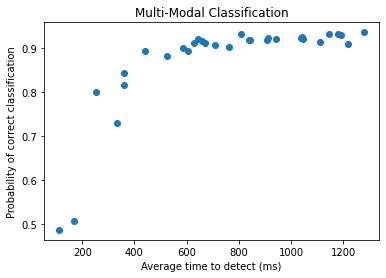

In [50]:
# Set the resolution for the threshold increments
res=1

# Create an array of thresholds from 1 to 20 with step size of 1/res
max_thresholds=30
thresholds = np.arange(0, max_thresholds + 1/res, 1/res)  

# Initialize lists to hold the calculated probabilities and average times for each threshold
Pcorrects = []
P_false_positives = []
P_false_negatives = []
P_HLISA = []
P_gremlins=[]
P_random_mouse_bot = []
P_random_mouse_with_sleep_bot = []
P_za_proxy=[]
P_survey_desktop=[]
Avg_times = []

# Set parameters for the number of trials and the maximum increment size
num_time_trials = 100
param =130

# Iterate over the different threshold values
for threshold in thresholds:
    # Initialize counters
    eps=0.01
    num_correct = 0
    total = eps
    total_desktop=eps
    total_gremlins = eps
    total_desktop_correct = eps
    num_correct_desktop_correct = 0
    total_non_desktop_correct = eps
    num_correct_non_desktop_correct = 0
    num_correct_hlisa=0
    num_correct_gremlins=0
    total_hlisa=eps
    num_correct_random_mouse_bot=0
    total_random_mouse_bot=eps
    num_correct_random_mouse_with_sleep_bot=0
    total_random_mouse_with_sleep_bot=0
    num_correct_line_bot=eps
    total_line_bot=eps
    num_correct_survey_desktop=0
    total_survey_desktop=eps
    total_za_proxy=eps
    num_correct_za_proxy=0

    # Initialize list to hold the detection times for each trial
    Time_to_detect = []
    
    # Iterate over the different names in the dataframe
    for name in df_names:
        # Skip 'bot_samples'
            # Perform trials for each name
        for i in range(num_time_trials):
            # Randomly select an index for the start of the frame to analyze
            
            
            index = np.random.randint(15000, len(Y_dict[name]) - param)
            
            # Calculate the maximum time difference for the selected frame
            diff_time_max = pos_dict['time'][name][index + param] - pos_dict['time'][name][index]
            diff_time_max_ms = diff_time_max.total_seconds() * 1000   
            
            # If the time difference is too large, select a new index until a suitable one is found
            # a large time difference may indicate change of user or a long pause which is not relevant to the analysis
            k=0
            while diff_time_max_ms>60000:
                k=k+1
                index = np.random.randint(15000, len(Y_dict[name]) - param)
                diff_time_max = pos_dict['time'][name][index + param] - pos_dict['time'][name][index]
                diff_time_max_ms = diff_time_max.total_seconds() * 1000
            
            # Initialize increment and flags for the frame analysis loop
            index_increment = 1
            flag = 0
            T_temp = 0
            
            # Analyze the frame until a condition is met or the maximum size is reached
            while flag == 0 and index_increment < param:
                # Get the frame data
                frame_data2 = Y_dict[name][index : index + index_increment]
                
                # Initialize the score dictionary
                score = {}
                # Calculate scores for the frame for each name
                for name1 in df_names:
                    score[name1] = model[name1].score(frame_data2)
                
                # Compare the score of each name with the maximum score of the others
                for name1 in df_names:
                    if score[name1] is np.nan or score[name1] is np.inf:
                        continue
                    else:
                        other_scores = [v for k, v in score.items() if k != name1]
                        other_temp=np.nanmax(list(other_scores))
                        if other_temp is np.nan or other_temp is np.inf:
                            model_name = name1
                            flag=1
                        else:
                            temp_score =score[name1] - other_temp
                    
                        # If the score difference is above the threshold, set the flag to end the loop
                            if temp_score > threshold:
                                model_name = name1
                                flag = 1

                        # Keep track of the name with the highest score difference
                            if temp_score > T_temp:
                                model_name = name1
                                T_temp = temp_score
                
                    # Increment the frame size
                index_increment += 1
            
            # Calculate the detection time for the selected frame
            diff_time = pos_dict['time'][name][index + index_increment] - pos_dict['time'][name][index]
            diff_time_ms = diff_time.total_seconds() * 1000
            Time_to_detect.append(diff_time_ms)       
            
            # Update counters based on the model's classification
            total += 1
            num_correct += int(model_name == name)      
            if name == 'survey_desktop':
                total_desktop+=1
                total_desktop_correct += 1
                num_correct_desktop_correct += int(model_name == name)
            if name != 'survey_desktop':
                total_non_desktop_correct += 1
                num_correct_non_desktop_correct += int(model_name != 'survey_desktop')
            if name == 'hlisa_traces':
                total_hlisa += 1
                num_correct_hlisa += int(model_name == name)
            if name == 'gremlins':
                total_gremlins += 1
                num_correct_gremlins += int(model_name == name)
            if name == 'random_mouse_bot':
                total_random_mouse_bot += 1
                num_correct_random_mouse_bot += int(model_name == name)
            if name== 'za_proxy':
                total_za_proxy += 1
                num_correct_za_proxy += int(model_name == name)

    # Calculate the overall probability of correct classification
    Pcorrect = num_correct / total  
    P_HLISA.append(num_correct_hlisa/total_hlisa)
    P_survey_desktop.append(num_correct_desktop_correct/total_desktop)
    P_random_mouse_bot.append(num_correct_random_mouse_bot/total_random_mouse_bot)
    #P_random_mouse_with_sleep_bot.append(num_correct_random_mouse_with_sleep_bot/total_random_mouse_with_sleep_bot)
    P_false_negatives.append(1-num_correct_non_desktop_correct/total_non_desktop_correct)
    P_false_positives.append(1-num_correct_desktop_correct/total_desktop_correct)   
    P_za_proxy.append(num_correct_za_proxy/total_za_proxy)
    P_gremlins.append(num_correct_gremlins/total_gremlins)
    # Calculate the average detection time
    Avg_time=np.average((Time_to_detect))
    
    # Print the results for this threshold
    print('threshold is:', threshold)
    print('Probability of correct classification:', Pcorrect)
    print('Probability of correct classification for desktop:', num_correct_desktop_correct/total_desktop_correct)
    print('Probability of correct classification for non-desktop:', num_correct_non_desktop_correct/total_non_desktop_correct)
    print('Probability of correct classification for hlisa:', num_correct_hlisa/total_hlisa)
    print('Probability of correct classification for random_mouse_bot:', num_correct_random_mouse_bot/total_random_mouse_bot)
    #print('Probability of correct classification for random_mouse_with_sleep_bot:', num_correct_random_mouse_with_sleep_bot/total_random_mouse_with_sleep_bot)
    print('Probability of correct classification for za_proxy:', num_correct_za_proxy/total_za_proxy)
    print('Average time to detect:', Avg_time)

                
    # Save the results for this threshold for plotting
    Pcorrects.append(Pcorrect) 
    Avg_times.append(Avg_time) 

# Create the plot of average detection time vs. probability of correct classification
plt.title('Multi-Modal Classification')
plt.scatter(Avg_times, Pcorrects) 
plt.xlabel('Average time to detect (ms)')
plt.ylabel('Probability of correct classification')
plt.show()


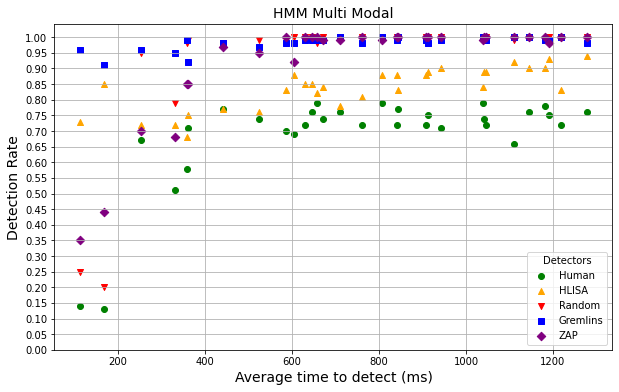

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming Avg_times, P_survey_desktop, P_HLISA, etc. are predefined arrays

# Create a new figure and set the size (optional)
plt.figure(figsize=(10, 6))

# Set the title of the combined plot
plt.title('HMM Multi Modal', fontsize=14)

# Scatter plots for each dataset with different colors and markers
plt.scatter(Avg_times, P_survey_desktop, color='g', marker='o', label='Human')
plt.scatter(Avg_times, P_HLISA, color='orange', marker='^', label='HLISA')
plt.scatter(Avg_times, P_random_mouse_bot, color='r', marker='v', label='Random')
plt.scatter(Avg_times, P_gremlins, color='b', marker='s', label='Gremlins')
plt.scatter(Avg_times, P_za_proxy, color='purple', marker='D', label='ZAP')

# Create labels for the axes
plt.xlabel('Average time to detect (ms)', fontsize=14)
plt.ylabel('Detection Rate',fontsize=14)

# Set y-axis resolution to 0.05
plt.yticks(np.arange(0, 1.05, 0.05))

# Turn on the grid
plt.grid()

# Add a legend to the plot (optional, but helpful)
plt.legend(title='Detectors', loc='lower right')

# Show the plot
plt.show()


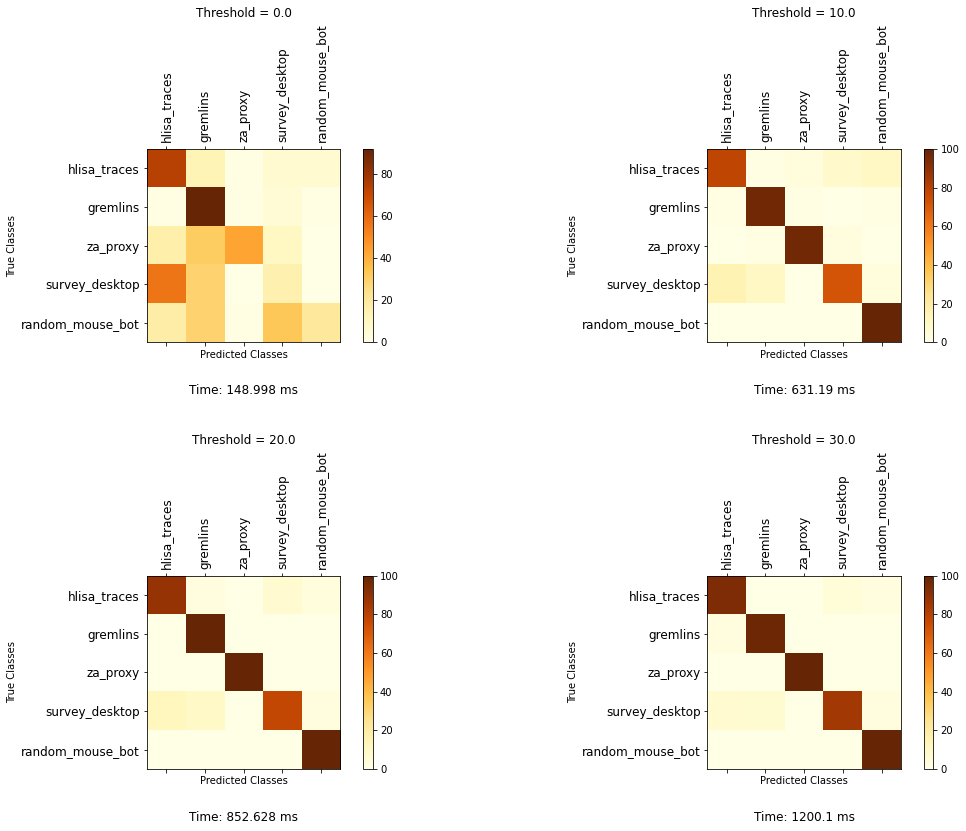

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Define class names for labeling the heatmap
class_names = ['hlisa_traces', 'gremlins', 'za_proxy', 'survey_desktop', 'random_mouse_bot']

# Choose a colormap for the heatmaps (e.g., 'YlOrBr' for orange and brown colors)
heatmap_cmap = 'YlOrBr'

# Get all the threshold values
thresholds = list(threshold_confusion_matrices.keys())[:6]

# Set the number of columns and rows in the grid
num_columns = 2
num_rows = 2
y_axis_fontsize = 12

# Create a figure with the specified grid layout
fig, axes = plt.subplots(num_rows, num_columns, figsize=(16, 12))

# Flatten the axes array for easy iteration
axes = axes.ravel()

# Iterate over different threshold values and plot the corresponding confusion matrix
for i, selected_threshold in enumerate(thresholds):
    # Get the confusion matrix for the selected threshold
    confusion_matrix_for_threshold = threshold_confusion_matrices[selected_threshold]

    # Create a new subplot for each threshold
    ax = axes[i]
    cax = ax.matshow(confusion_matrix_for_threshold, cmap=heatmap_cmap)
    ax.set_title(f'Threshold = {selected_threshold}')
    ax.set_xlabel('Predicted Classes')
    ax.set_ylabel('True Classes')
    #ax.set_xticks(range(len(class_names))  # Set x-axis ticks
    ax.set_xticks(range(len(class_names)), class_names, rotation='vertical',fontsize=y_axis_fontsize)
    ax.set_yticks(range(len(class_names)), class_names,fontsize=y_axis_fontsize)
    #ax.set_yticks((class_names)) # Set y-axis ticks
    ax.annotate(f'Time: {Avg_times[i]} ms', xy=(0.5, -0.25), xycoords='axes fraction',
                fontsize=12, ha='center', va='center')
    plt.colorbar(cax, ax=ax)

# Adjust layout to prevent overlapping labels
plt.tight_layout()

# Display the figure
plt.show()


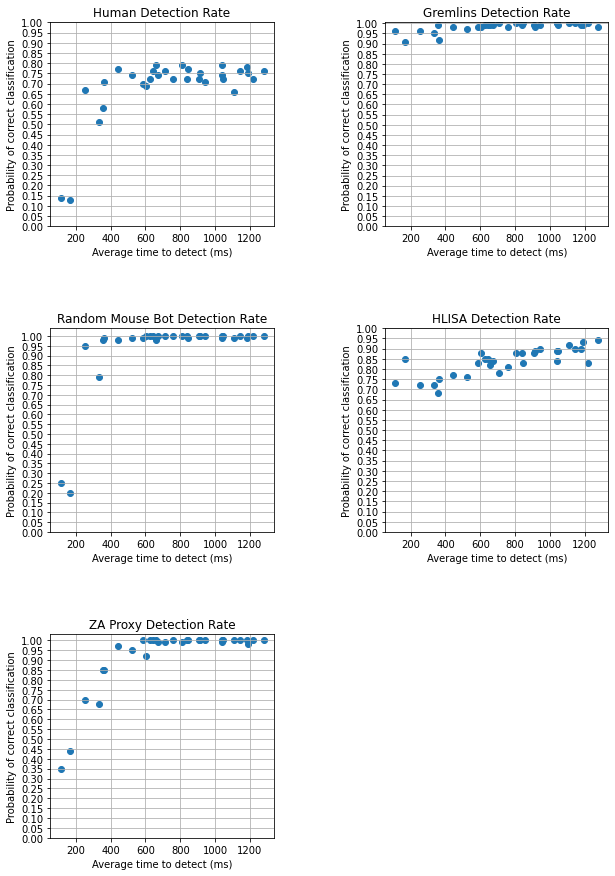

In [74]:
# SINGLE_MODALITY_LSTM
import matplotlib.pyplot as plt
import numpy as np

# Create a figure with 2 rows and 2 columns of subplots
# fig, axs = plt.subplots(2, 3, figsize=(12, 10))

# del axs[1, 2]
# axs = axs[:-1]
plt.figure(figsize=(10, 15))
ax1 = plt.subplot(321)  # First subplot
ax2 = plt.subplot(323)  # Second subplot
ax3 = plt.subplot(325)  # Third subplot
ax4 = plt.subplot(322)  # Fourth subplot
ax5 = plt.subplot(324)  # Fifth subplot
# Increase the font size throughout the figure


# Plot 1: Multi-Modal Classification
ax1.scatter(Avg_times, P_survey_desktop)
ax1.set_title('Human Detection Rate')
ax1.set_xlabel('Average time to detect (ms)')
ax1.set_ylabel('Probability of correct classification')
ax1.set_yticks(np.arange(0, 1.05, 0.05))
ax1.grid()



# Plot 1: Multi-Modal Classification
ax2.scatter(Avg_times, P_random_mouse_bot)
ax2.set_title('Random Mouse Bot Detection Rate')
ax2.set_xlabel('Average time to detect (ms)')
ax2.set_ylabel('Probability of correct classification')
ax2.set_yticks(np.arange(0, 1.05, 0.05))
ax2.grid()

# Plot 2: False Positive Rate
ax3.scatter(Avg_times, P_za_proxy)
ax3.set_title('ZA Proxy Detection Rate')
ax3.set_xlabel('Average time to detect (ms)')
ax3.set_ylabel('Probability of correct classification')
ax3.set_yticks(np.arange(0, 1.05, 0.05))
ax3.grid()

# Plot 3: False Negative Rate
ax4.scatter(Avg_times, P_gremlins)
ax4.set_title('Gremlins Detection Rate')
ax4.set_xlabel('Average time to detect (ms)')
ax4.set_ylabel('Probability of correct classification')
ax4.set_yticks(np.arange(0, 1.05, 0.05))
ax4.grid()

# Plot 4: HLISA Detection Rate
ax5.scatter(Avg_times, P_HLISA)
ax5.set_title('HLISA Detection Rate')
ax5.set_xlabel('Average time to detect (ms)')
ax5.set_ylabel('Probability of correct classification')
ax5.set_yticks(np.arange(0, 1.05, 0.05))
ax5.grid()

# plt.tight_layout()
plt.subplots_adjust(wspace=0.5, hspace=0.5)


# Show the plots
plt.show()
# Adjust layout to prevent overlapping titles